In [2]:
import sys  
sys.path.insert(0, '..')

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker, style

from datetime import date, timedelta

from config import Config

import pandas as pd
import numpy as np
from sqlalchemy import create_engine

plt.rcParams["figure.figsize"] = [20,12]

db = create_engine(Config.SQLALCHEMY_DATABASE_URI)

In [59]:
df = pd.read_sql_query("select * from uzis_modely_05_hospitalizovani", db.engine).fillna(0)
df

,id,vek_kat,pohlavi,kraj_bydliste,kraj_prvni_nemocnice,datum_priznaku,datum_odberu,datum_positivity,stav_dle_khs,zahajeni_hosp,...,upv,upv_pocatek,dni_upv,upv_posledni,ecmo,ecmo_pocatek,dni_ecmo,ecmo_posledni,umrti,datum_umrti
0,22292494,30-34,M,CZ031,CZ031,2021-02-10,2021-02-10,2021-02-10,0,2021-02-10,...,False,0,0,0,False,0,0,0,False,0
1,22292495,90-94,Z,CZ031,CZ031,2021-02-15,2021-02-15,2021-02-13,0,2021-02-13,...,False,0,0,0,False,0,0,0,False,0
2,22292496,55-59,Z,CZ064,CZ064,2021-01-03,2021-01-03,2021-01-03,0,2021-01-04,...,False,0,0,0,False,0,0,0,False,0
3,22292497,65-69,M,CZ052,CZ052,0,0,2020-11-29,0,2020-11-29,...,False,0,0,0,False,0,0,0,False,0
4,22292498,80-84,Z,CZ072,CZ053,2020-09-29,2020-10-06,2020-10-07,Střední - Střední,2020-10-07,...,False,0,0,0,False,0,0,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161291,22453785,30-34,M,CZ041,CZ064,0,0,2020-11-17,0,2020-11-17,...,True,2020-11-17,5,2020-11-21,True,2020-11-17,3,2020-11-19,False,0
161292,22453786,30-34,Z,CZ020,CZ010,0,0,2021-11-29,0,2021-11-29,...,False,0,0,0,False,0,0,0,False,0
161293,22453787,25-29,Z,CZ063,CZ063,0,0,2021-03-21,0,2021-03-21,...,False,0,0,0,False,0,0,0,False,0
161294,22453788,20-24,Z,CZ010,CZ010,0,0,2021-11-18,0,2021-11-18,...,False,0,0,0,False,0,0,0,False,0


In [88]:
df21 = df[df['datum_positivity'] >= date(2021, 9, 1)]
df20 = df[(df['datum_positivity'] >= date(2020, 9, 1)) & (df['datum_positivity'] <= date(2020, 12, 10))]

array([[<AxesSubplot:title={'center':'0-4'}>,
        <AxesSubplot:title={'center':'10-14'}>,
        <AxesSubplot:title={'center':'100-104'}>,
        <AxesSubplot:title={'center':'15-19'}>,
        <AxesSubplot:title={'center':'20-24'}>],
       [<AxesSubplot:title={'center':'25-29'}>,
        <AxesSubplot:title={'center':'30-34'}>,
        <AxesSubplot:title={'center':'35-39'}>,
        <AxesSubplot:title={'center':'40-44'}>,
        <AxesSubplot:title={'center':'45-49'}>],
       [<AxesSubplot:title={'center':'5-9'}>,
        <AxesSubplot:title={'center':'50-54'}>,
        <AxesSubplot:title={'center':'55-59'}>,
        <AxesSubplot:title={'center':'60-64'}>,
        <AxesSubplot:title={'center':'65-69'}>],
       [<AxesSubplot:title={'center':'70-74'}>,
        <AxesSubplot:title={'center':'75-79'}>,
        <AxesSubplot:title={'center':'80-84'}>,
        <AxesSubplot:title={'center':'85-89'}>,
        <AxesSubplot:title={'center':'90-94'}>],
       [<AxesSubplot:title={'center':'

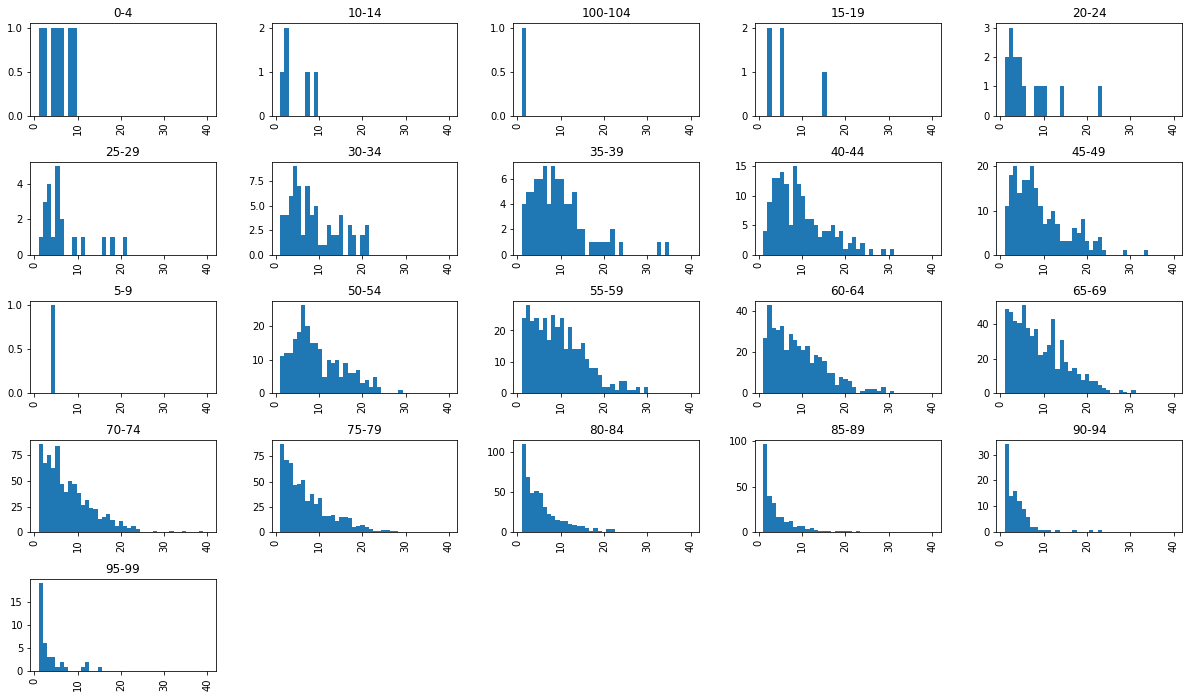

In [89]:
df21[df21['tezky_stav']].hist('dni_tezky_stav', by=df21['vek_kat'], bins=40, range=(1,40))

array([[<AxesSubplot:title={'center':'0-4'}>,
        <AxesSubplot:title={'center':'100-104'}>,
        <AxesSubplot:title={'center':'15-19'}>,
        <AxesSubplot:title={'center':'20-24'}>],
       [<AxesSubplot:title={'center':'25-29'}>,
        <AxesSubplot:title={'center':'30-34'}>,
        <AxesSubplot:title={'center':'35-39'}>,
        <AxesSubplot:title={'center':'40-44'}>],
       [<AxesSubplot:title={'center':'45-49'}>,
        <AxesSubplot:title={'center':'5-9'}>,
        <AxesSubplot:title={'center':'50-54'}>,
        <AxesSubplot:title={'center':'55-59'}>],
       [<AxesSubplot:title={'center':'60-64'}>,
        <AxesSubplot:title={'center':'65-69'}>,
        <AxesSubplot:title={'center':'70-74'}>,
        <AxesSubplot:title={'center':'75-79'}>],
       [<AxesSubplot:title={'center':'80-84'}>,
        <AxesSubplot:title={'center':'85-89'}>,
        <AxesSubplot:title={'center':'90-94'}>,
        <AxesSubplot:title={'center':'95-99'}>]], dtype=object)

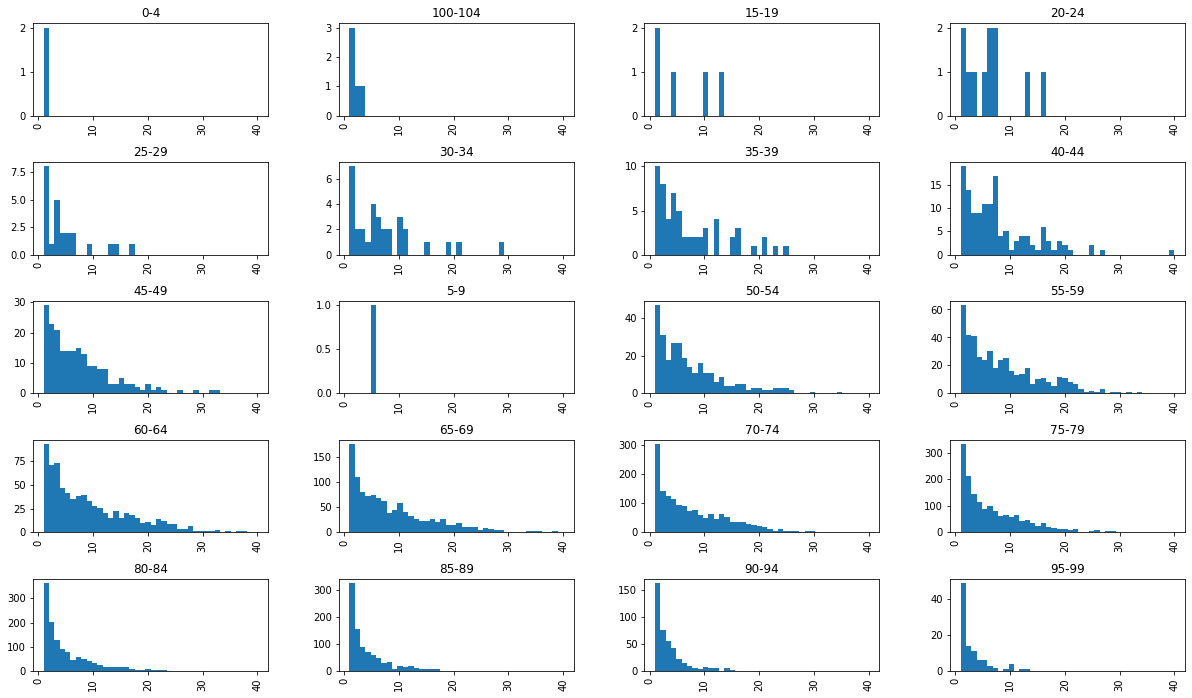

In [90]:
df20[df20['tezky_stav']].hist('dni_tezky_stav', by=df20['vek_kat'], bins=40, range=(1,40))

array([[<AxesSubplot:title={'center':'0-4'}>,
        <AxesSubplot:title={'center':'10-14'}>,
        <AxesSubplot:title={'center':'100-104'}>,
        <AxesSubplot:title={'center':'15-19'}>,
        <AxesSubplot:title={'center':'20-24'}>],
       [<AxesSubplot:title={'center':'25-29'}>,
        <AxesSubplot:title={'center':'30-34'}>,
        <AxesSubplot:title={'center':'35-39'}>,
        <AxesSubplot:title={'center':'40-44'}>,
        <AxesSubplot:title={'center':'45-49'}>],
       [<AxesSubplot:title={'center':'5-9'}>,
        <AxesSubplot:title={'center':'50-54'}>,
        <AxesSubplot:title={'center':'55-59'}>,
        <AxesSubplot:title={'center':'60-64'}>,
        <AxesSubplot:title={'center':'65-69'}>],
       [<AxesSubplot:title={'center':'70-74'}>,
        <AxesSubplot:title={'center':'75-79'}>,
        <AxesSubplot:title={'center':'80-84'}>,
        <AxesSubplot:title={'center':'85-89'}>,
        <AxesSubplot:title={'center':'90-94'}>],
       [<AxesSubplot:title={'center':'

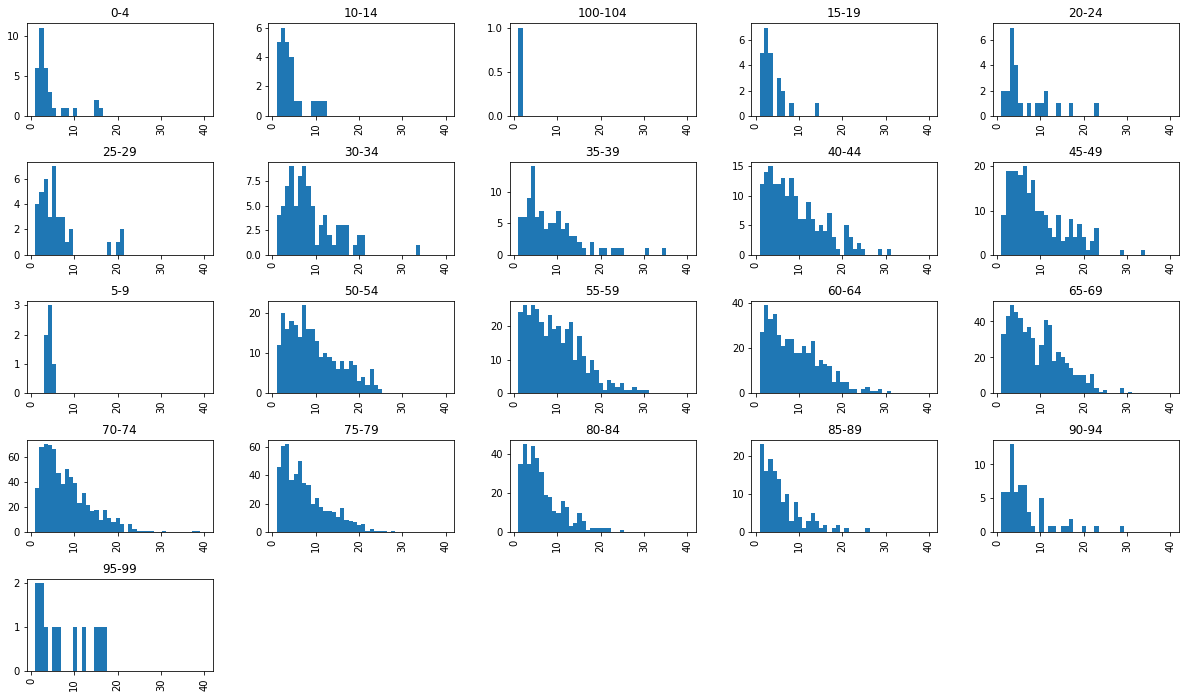

In [63]:
df21[df21['jip']].hist('dni_jip', by=df21['vek_kat'], bins=40, range=(1,40))

array([[<AxesSubplot:title={'center':'0-4'}>,
        <AxesSubplot:title={'center':'10-14'}>,
        <AxesSubplot:title={'center':'100-104'}>,
        <AxesSubplot:title={'center':'15-19'}>,
        <AxesSubplot:title={'center':'20-24'}>],
       [<AxesSubplot:title={'center':'25-29'}>,
        <AxesSubplot:title={'center':'30-34'}>,
        <AxesSubplot:title={'center':'35-39'}>,
        <AxesSubplot:title={'center':'40-44'}>,
        <AxesSubplot:title={'center':'45-49'}>],
       [<AxesSubplot:title={'center':'5-9'}>,
        <AxesSubplot:title={'center':'50-54'}>,
        <AxesSubplot:title={'center':'55-59'}>,
        <AxesSubplot:title={'center':'60-64'}>,
        <AxesSubplot:title={'center':'65-69'}>],
       [<AxesSubplot:title={'center':'70-74'}>,
        <AxesSubplot:title={'center':'75-79'}>,
        <AxesSubplot:title={'center':'80-84'}>,
        <AxesSubplot:title={'center':'85-89'}>,
        <AxesSubplot:title={'center':'90-94'}>],
       [<AxesSubplot:title={'center':'

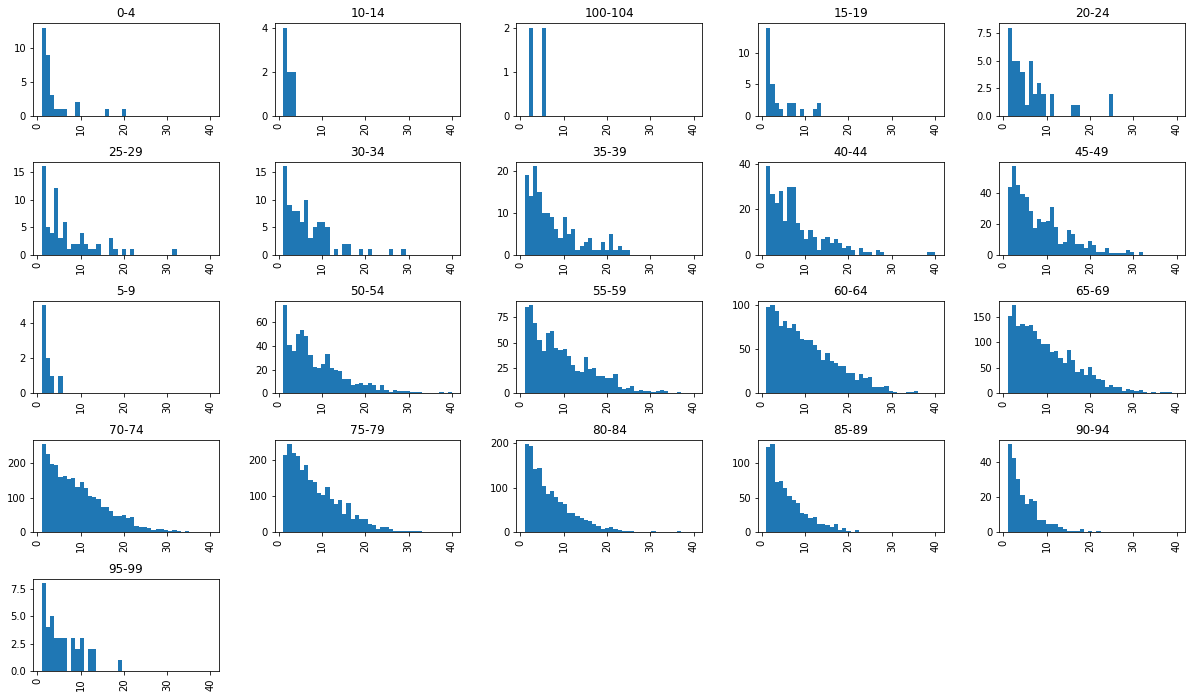

In [64]:
df20[df20['jip']].hist('dni_jip', by=df20['vek_kat'], bins=40, range=(1,40))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'0-4'}>,
        <AxesSubplot:title={'center':'10-14'}>,
        <AxesSubplot:title={'center':'100-104'}>,
        <AxesSubplot:title={'center':'15-19'}>],
       [<AxesSubplot:title={'center':'20-24'}>,
        <AxesSubplot:title={'center':'25-29'}>,
        <AxesSubplot:title={'center':'30-34'}>,
        <AxesSubplot:title={'center':'35-39'}>,
        <AxesSubplot:title={'center':'40-44'}>],
       [<AxesSubplot:title={'center':'45-49'}>,
        <AxesSubplot:title={'center':'5-9'}>,
        <AxesSubplot:title={'center':'50-54'}>,
        <AxesSubplot:title={'center':'55-59'}>,
        <AxesSubplot:title={'center':'60-64'}>],
       [<AxesSubplot:title={'center':'65-69'}>,
        <AxesSubplot:title={'center':'70-74'}>,
        <AxesSubplot:title={'center':'75-79'}>,
        <AxesSubplot:title={'center':'80-84'}>,
        <AxesSubplot:title={'center':'85-89'}>],
       [<AxesSubplot:title={'center':'90-9

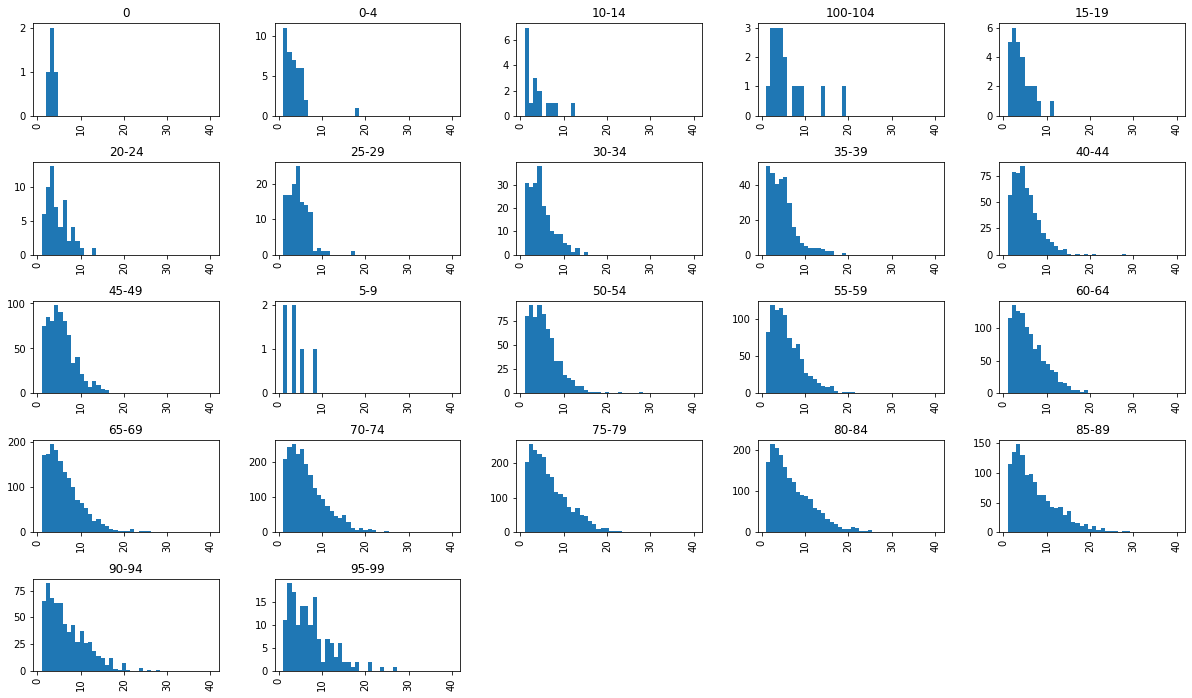

In [65]:
df21[df21['kyslik']].hist('dni_kyslik', by=df21['vek_kat'], bins=40, range=(1,40))

array([[<AxesSubplot:title={'center':'0-4'}>,
        <AxesSubplot:title={'center':'10-14'}>,
        <AxesSubplot:title={'center':'15-19'}>,
        <AxesSubplot:title={'center':'20-24'}>],
       [<AxesSubplot:title={'center':'25-29'}>,
        <AxesSubplot:title={'center':'30-34'}>,
        <AxesSubplot:title={'center':'35-39'}>,
        <AxesSubplot:title={'center':'40-44'}>],
       [<AxesSubplot:title={'center':'45-49'}>,
        <AxesSubplot:title={'center':'50-54'}>,
        <AxesSubplot:title={'center':'55-59'}>,
        <AxesSubplot:title={'center':'60-64'}>],
       [<AxesSubplot:title={'center':'65-69'}>,
        <AxesSubplot:title={'center':'70-74'}>,
        <AxesSubplot:title={'center':'75-79'}>,
        <AxesSubplot:title={'center':'80-84'}>],
       [<AxesSubplot:title={'center':'85-89'}>,
        <AxesSubplot:title={'center':'90-94'}>,
        <AxesSubplot:title={'center':'95-99'}>, <AxesSubplot:>]],
      dtype=object)

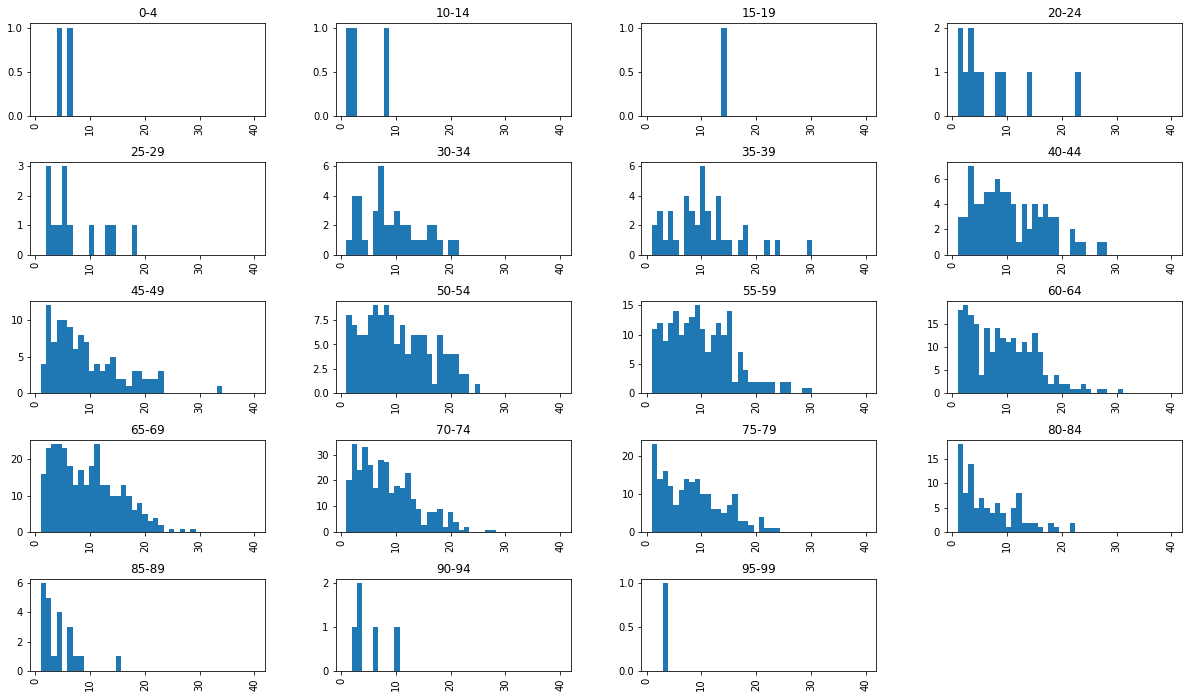

In [74]:
df21[df21['upv']].hist('dni_upv', by=df21['vek_kat'], bins=40, range=(1,40))

array([[<AxesSubplot:title={'center':'20-24'}>,
        <AxesSubplot:title={'center':'25-29'}>,
        <AxesSubplot:title={'center':'30-34'}>],
       [<AxesSubplot:title={'center':'35-39'}>,
        <AxesSubplot:title={'center':'40-44'}>,
        <AxesSubplot:title={'center':'45-49'}>],
       [<AxesSubplot:title={'center':'50-54'}>,
        <AxesSubplot:title={'center':'55-59'}>,
        <AxesSubplot:title={'center':'60-64'}>],
       [<AxesSubplot:title={'center':'65-69'}>,
        <AxesSubplot:title={'center':'70-74'}>,
        <AxesSubplot:title={'center':'80-84'}>]], dtype=object)

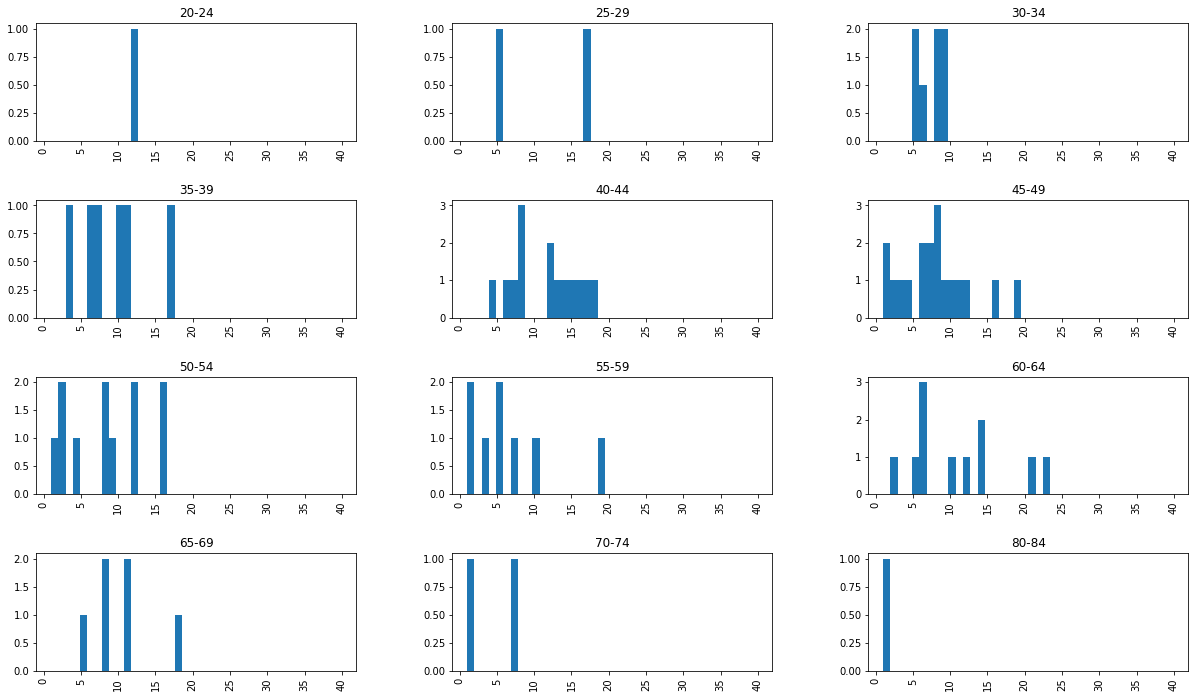

In [75]:
df21[df21['ecmo']].hist('dni_ecmo', by=df21['vek_kat'], bins=40, range=(1,40))

In [92]:
dfn = df.copy()
dfn.loc[dfn['tezky_stav'] == False, 'dni_tezky_stav'] = np.nan
dfn.loc[dfn['jip'] == False, 'dni_jip'] = np.nan
dfn.loc[dfn['kyslik'] == False, 'dni_kyslik'] = np.nan
dfn.loc[dfn['upv'] == False, 'dni_upv'] = np.nan
dfn.loc[dfn['ecmo'] == False, 'dni_ecmo'] = np.nan

In [93]:
dfn[dfn['umrti'] == False].groupby('vek_kat').mean()[['dni_tezky_stav', 'dni_jip', 'dni_kyslik', 'dni_upv', 'dni_ecmo']]

,dni_tezky_stav,dni_jip,dni_kyslik,dni_upv,dni_ecmo
vek_kat,,,,,
0,23.000000,14.000000,3.625000,5.000000,NaN
0-4,4.153846,3.709302,3.136986,4.166667,NaN
10-14,4.200000,3.880000,3.710526,5.000000,NaN
100-104,3.500000,2.666667,9.045455,NaN,NaN
105-109,NaN,NaN,9.000000,NaN,NaN
15-19,5.857143,4.506494,3.785714,7.875000,2.000000
20-24,6.957447,6.252747,4.314815,8.480000,11.333333
25-29,6.765306,6.269006,4.096234,7.346939,8.333333
30-34,7.907834,7.509868,4.600667,9.009434,6.642857


In [4]:
hosp = pd.read_sql_query("select vek_kat, datum_positivity, tezky_stav, jip, kyslik, upv, ecmo from uzis_modely_05_hospitalizovani", db.engine)
hosp['vek_kat'] = hosp['vek_kat'].replace({'0-4': '0-24', '5-9': '0-24', '90+': '80+'})
dfa

,vek_kat,datum_positivity,tezky_stav,jip,kyslik,upv,ecmo
0,30-34,2021-02-10,False,False,False,False,False
1,90-94,2021-02-13,True,True,True,False,False
2,55-59,2021-01-03,False,False,True,False,False
3,65-69,2020-11-29,False,False,True,False,False
4,80-84,2020-10-07,True,False,True,False,False
...,...,...,...,...,...,...,...
161291,30-34,2020-11-17,True,True,True,True,True
161292,30-34,2021-11-29,False,False,False,False,False
161293,25-29,2021-03-21,False,False,True,False,False
161294,20-24,2021-11-18,False,False,False,False,False


In [6]:
nak = pd.read_sql_query("select * from nakazeni", db.engine)
nak

,datum,vekova_skupina,kraj_nuts_kod,pocet
0,2020-03-01,18-24,CZ010,1
1,2020-03-01,40-44,CZ042,1
2,2020-03-01,65-69,CZ010,1
3,2020-03-03,18-24,CZ010,1
4,2020-03-03,50-54,CZ042,1
...,...,...,...,...
97469,2021-12-09,80+,CZ063,19
97470,2021-12-09,80+,CZ064,32
97471,2021-12-09,80+,CZ071,23
97472,2021-12-09,80+,CZ072,19
